# Loan 데이터 분류모형 예측성능 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [4]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## 로지스틱 회귀분석

In [6]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0, max_iter = 1000)
m1.fit(X_train, y_train)
m1_prob = m1.predict_proba(X_test)
pd.DataFrame(m1_prob)

,0,1
0,0.797334,0.202666
1,0.772756,0.227244
2,0.765714,0.234286
3,0.756511,0.243489
4,0.642193,0.357807
...,...,...
2792,0.551095,0.448905
2793,0.740449,0.259551
2794,0.485864,0.514136
2795,0.413873,0.586127


### ROC 커브 및 AUC

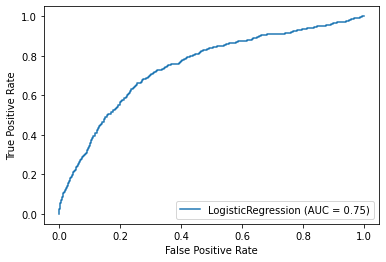

In [7]:
from sklearn.metrics import plot_roc_curve
m1_roc=plot_roc_curve(m1, X_test, y_test)

## 나무 모형

### Pruning : Alpha=0.0, min_impurity_decrease=0.0005,  min_samples_split=2  트리

In [8]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
m2.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

In [9]:
m2_prob = m2.predict_proba(X_test)
m2_prob

array([[0.00716846, 0.99283154],
       [0.91304348, 0.08695652],
       [0.9574124 , 0.0425876 ],
       ...,
       [0.00716846, 0.99283154],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [10]:
threshold = 0.3
m2_pred = (m2_prob[:,1]>threshold).astype(int)
m2_pred

array([1, 0, 0, ..., 1, 0, 1])

In [11]:
from sklearn.metrics import confusion_matrix
m2_cm = confusion_matrix(y_test, m2_pred)
pd.DataFrame(m2_cm)

,0,1
0,2055,66
1,214,462


In [12]:
# 정확도
accu2 = np.trace(m2_cm)/len(y_test)
print('정확도 :', np.round(accu2,2))

# 특이도, 민감도
spec2, sens2 = np.diag(m2_cm) / np.sum(m2_cm, axis = 1)
print('특이도 :', np.round(spec2,2))
print('민감도 :', np.round(sens2,2))

# 정밀도
prec2 = m2_cm[1,1] / np.sum(m2_cm, axis=0)[1]
print('정밀도 :', np.round(prec2,2))

# F1-score
f1_2 = 2*prec2*sens2 / (prec2+sens2)
print('F1-score :', np.round(f1_2,2))

정확도 : 0.9
특이도 : 0.97
민감도 : 0.68
정밀도 : 0.88
F1-score : 0.77


### ROC 곡선 및 AUC

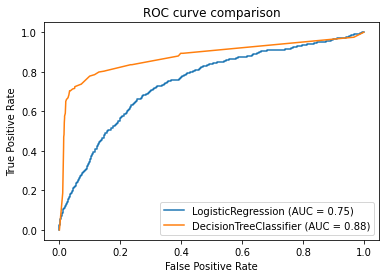

In [13]:
from sklearn.metrics import plot_roc_curve
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

## 다른 분류방법과의 비교

### 신경망분석

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [15]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### 랜덤포레스트

In [16]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### ROC 곡선 및 AUC

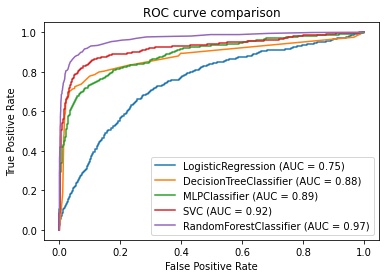

In [17]:
m1_roc=plot_roc_curve(m1, X_test, y_test)
plot_roc_curve(m2, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()